In [43]:
import pandas as pd
import numpy as np
from FileOpener.CSVReader.CSVReader import CSVReader as csv
import matplotlib.pyplot as plt

% matplotlib inline

In [6]:
prc_directory = 'CSVFile/Price/Korea/Stocks'
kse_file_name = 'KOSPI_FROM_1998_close.csv'
kdq_file_name = 'KOSDAQ_FROM_1998_close.csv'

kse_price = csv.price_reader(kse_file_name, prc_directory)
kdq_price = csv.price_reader(kdq_file_name, prc_directory)

In [84]:
kse_rt = kse_price.div(kse_price.shift(1)).dropna(axis=0, how='all').loc[:'2018-12-31']
kse_rt[kse_rt > 1.3] = 1.3
kdq_rt = kdq_price.div(kdq_price.shift(1)).dropna(axis=0, how='all').loc[:'2018-12-31']

In [29]:
kse_rt.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
D A T E,,,,,,,,,,,,,,,,,,,,,
1998-01-03,1.028922,0.920833,1.017419,0.923055,1.000000,1.079723,1.078918,1.077551,0.938628,1.076553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,0.983134,1.079186,0.993152,0.925972,1.035088,1.043339,1.079580,1.079545,1.076923,1.079086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,0.971409,1.079665,0.972418,1.079947,0.988444,1.000000,1.079917,1.077193,1.078571,1.076895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,0.979397,1.079612,0.975181,0.925972,1.022603,0.955385,0.996621,1.078176,1.072848,1.074837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,0.979030,1.078237,0.952735,1.000000,1.076982,1.043478,1.061822,1.078550,1.018519,1.022196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
kdq_rt.head()

,A000250,A000380,A000440,A000530,A000550,A000600,A000870,A001000,A001540,A001810,...,A900290,A900300,A900310,A900340,A950030,A950110,A950130,A950140,A950160,A950170
D A T E,,,,,,,,,,,,,,,,,,,,,
1998-01-03,NaN,1.079573,1.0,NaN,NaN,NaN,1.080000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,NaN,1.000000,1.0,NaN,NaN,NaN,1.077160,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,NaN,1.000000,1.0,NaN,NaN,NaN,1.077364,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,NaN,1.000000,1.0,NaN,NaN,NaN,1.079787,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,NaN,1.000000,1.0,NaN,NaN,NaN,1.078818,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Resampled Return

### 1. Calculating Return
### 2. Filter 
     -- return < 0 among those less than average

In [85]:
def n_filter(data, period):
    
    ## 1. Calculating Monthly Return
    ret = data.resample(period).prod()
    ## 2. 떨어진 주식 고르기
    ret_filter = ret[ret < 1]
    loss_ret_mean = ret_filter.mean(axis=1)
    
    return ret_filter.sub(loss_ret_mean, axis = 0) < 0

In [86]:
KOSPI_down_rt = n_filter(kse_rt, 'M')
KOSDQ_down_rt = n_filter(kdq_rt, 'M')

In [87]:
from FileOpener.backtester import FinancialBacktest, PfAnalysis

In [88]:
KOPSI_BACK_RT = FinancialBacktest(kse_price).backtest(KOSPI_down_rt, 'M','M')
KOPDAQ_BACK_RT = FinancialBacktest(kdq_price).backtest(KOSDQ_down_rt, 'M','M')

In [89]:
pf_KOPSI = PfAnalysis(KOPSI_BACK_RT)
pf_KODAQ = PfAnalysis(KOPDAQ_BACK_RT)

In [90]:
FinancialBacktest(kse_price).back_date(KOSPI_down_rt, 'M')

(DatetimeIndex(['1998-01-31', '1998-02-28', '1998-03-31', '1998-04-30',
                '1998-05-31', '1998-06-30', '1998-07-31', '1998-08-31',
                '1998-09-30', '1998-10-31',
                ...
                '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
                '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
                '2018-11-30', '2018-12-31'],
               dtype='datetime64[ns]', length=252, freq='M'),
 DatetimeIndex(['1998-02-01', '1998-03-01', '1998-04-01', '1998-05-01',
                '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01',
                '1998-10-01', '1998-11-01',
                ...
                '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
                '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
                '2018-12-01', '2019-01-01'],
               dtype='datetime64[ns]', length=252, freq='MS'),
 DatetimeIndex(['1998-02-28', '1998-03-31', '1998-04-30', '1998-05-31',
         

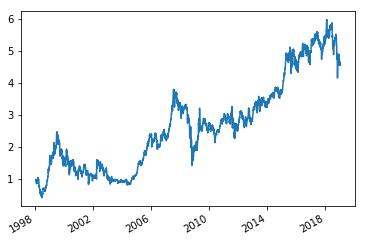

In [91]:
pf_KOPSI.cumReturn().plot()

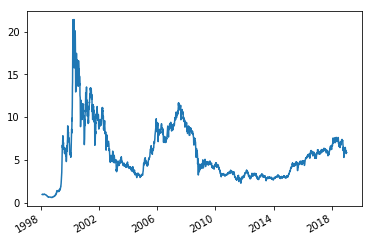

In [92]:
pf_KODAQ.cumReturn().plot()

In [93]:
print(f"Total Return for KOSPI: {round(pf_KOPSI.totalReturn() * 100, 2)}%")
print(f"Total Return for KOSDAQ: {round(pf_KODAQ.totalReturn() * 100, 2)}%")

Total Return for KOSPI: 356.7%
Total Return for KOSDAQ: 485.68%


In [94]:
print(f"CAGR for KOSPI: {round(pf_KOPSI.cagr() * 100, 2)}%")
print(f"CAGR for KOSDAQ: {round(pf_KODAQ.cagr() * 100, 2)}%")

CAGR for KOSPI: 7.53%
CAGR for KOSDAQ: 8.82%


In [95]:
print(f"Maximum DrawDown for KOSPI: {round(abs(pf_KOPSI.maxDrawDown()) * 100, 2)}%")
print(f"Maximum DrawDown for KOSDAQ: {round(abs(pf_KODAQ.maxDrawDown()) * 100, 2)}%")

Maximum DrawDown for KOSPI: 60.59%
Maximum DrawDown for KOSDAQ: 68.23%


In [96]:
KOSPI_down_rt = n_filter(kse_rt, 'Q')
KOSDQ_down_rt = n_filter(kdq_rt, 'Q')

from FileOpener.backtester import FinancialBacktest, PfAnalysis

KOPSI_Q_BACK_RT = FinancialBacktest(kse_price).backtest(KOSPI_down_rt, 'Q','Q')
KOPDAQ_Q_BACK_RT = FinancialBacktest(kdq_price).backtest(KOSDQ_down_rt, 'Q','Q')

pf_Q_KOPSI = PfAnalysis(KOPSI_Q_BACK_RT)
pf_Q_KODAQ = PfAnalysis(KOPDAQ_Q_BACK_RT)

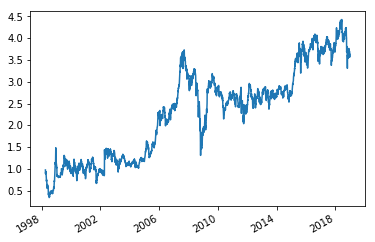

In [103]:
pf_Q_KOPSI.cumReturn().plot()

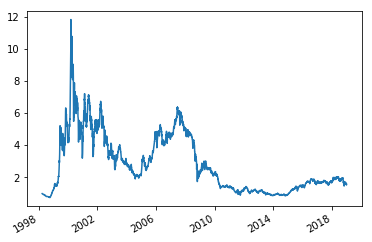

In [104]:
pf_Q_KODAQ.cumReturn().plot()

In [97]:
print(f"Total Return for KOSPI: {round(pf_Q_KOPSI.totalReturn() * 100, 2)}%")
print(f"Total Return for KOSDAQ: {round(pf_Q_KODAQ.totalReturn() * 100, 2)}%")

Total Return for KOSPI: 262.54%
Total Return for KOSDAQ: 58.19%


In [98]:
print(f"CAGR for KOSPI: {round(pf_Q_KOPSI.cagr() * 100, 2)}%")
print(f"CAGR for KOSDAQ: {round(pf_Q_KODAQ.cagr() * 100, 2)}%")

CAGR for KOSPI: 6.4%
CAGR for KOSDAQ: 2.23%


In [99]:
print(f"Maximum DrawDown for KOSPI: {round(abs(pf_Q_KOPSI.maxDrawDown()) * 100, 2)}%")
print(f"Maximum DrawDown for KOSDAQ: {round(abs(pf_Q_KODAQ.maxDrawDown()) * 100, 2)}%")

Maximum DrawDown for KOSPI: 65.0%
Maximum DrawDown for KOSDAQ: 72.9%


In [108]:
FinancialBacktest(kse_price).back_date(KOSPI_down_rt, 'Q')

(DatetimeIndex(['1998-03-31', '1998-06-30', '1998-09-30', '1998-12-31',
                '1999-03-31', '1999-06-30', '1999-09-30', '1999-12-31',
                '2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
                '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
                '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
                '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
                '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
                '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
                '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
                '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
                '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
                '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
                '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
                '2011-03-31', '2011-06-30', '2011-09-30', '2011-